# Cálculo del desplazamiento cuadrático medio

Este método es válido para una serie de posiciones (equiespaciadas en el tiempo).

## Movimiento Browniano

Para este ejemplo, primero tenemos que simular un array de datos para las posiciones 'x' en un hipotético movimiento browniano unidimensional:

[[ 0.2351174 ]
 [ 0.9591867 ]
 [ 0.0453631 ]
 [-0.90129963]
 [-1.51454901]
 [ 0.34688129]
 [ 1.04026198]
 [ 0.0832468 ]
 [ 1.7144043 ]
 [ 2.17221085]]


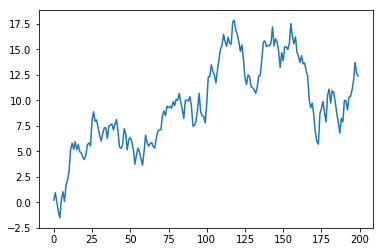

In [6]:
import numpy as np
import matplotlib.pyplot as plt

n = 200
x = np.zeros((n,1))

# Generamos un array de numeros aleatorios del mismo tamaño que x
r = np.random.normal(size=x.shape)
# Se forma el movimiento browniano sumando cumulativamente los números aleatorios
np.cumsum(r, axis=0, out=x)

print(x[0:10])
plt.plot(x)

## Desplazamiento cuadrático medio (MSD)

El desplazamiento cuadrático medio se define para un determinado tiempo dt entre dos instantes, 'lag time'. La definición formal quedaría:

$$ MSD_{dt} =  \frac{1}{T_{max}-dt}\displaystyle\sum_{t=0}^{T_{max}-dt} \left( x(t+dt) - x(t) \right)  $$

Esto lo podemos traducir a una función Python de la siguiente manera:

In [7]:
def simpleMSD(data, lagTime):
    """ Given a one-dimensional array 'data', computes the Mean Squared
        Displacement for a specified lag time """
    return np.mean((data[lagTime:] - data[:-lagTime])**2)

simpleMSD(x, 5)

4.821184954217973

Es conveniente pararse a explicar como funciona este algoritmo. Se restan dos copias (desplazadas dt) del array de posiciones. Todos los valores del array resultante se elevan al cuadrado y se calcula la media.
![alt text](msd.png "Función MSD")

## Representación del MSD

Normalmente nos interesa representar el desplazamiento cuadrático medio para distintos valores de dt. Esto lo podemos conseguir mediante la siguiente función:

[[ 1.          0.99696274]
 [ 2.          2.10086735]
 [ 3.          2.99382834]
 [ 4.          3.92485958]
 [ 5.          4.82118495]
 [ 6.          5.66455226]
 [ 7.          6.80471008]
 [ 8.          7.75499811]
 [ 9.          8.78987037]
 [10.          9.88025016]
 [11.         10.71759879]
 [12.         11.34897682]
 [13.         11.55635671]
 [14.         11.86649689]
 [15.         12.49191017]
 [16.         13.32333045]
 [17.         14.07381701]
 [18.         14.82699255]
 [19.         15.38075444]]


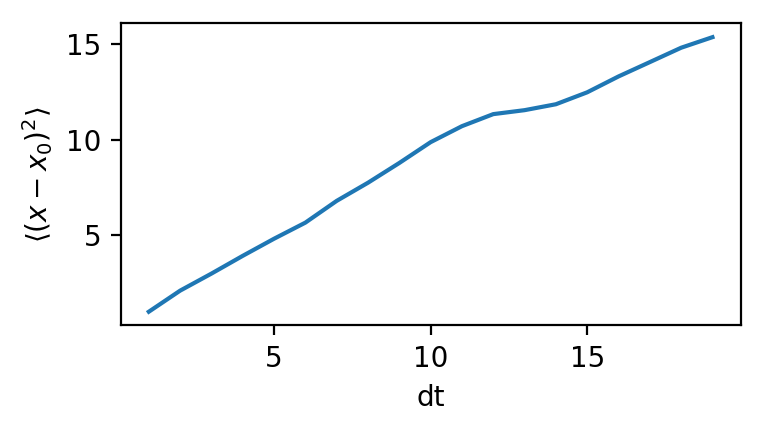

In [8]:
def meanSquaredDisplacement(data, max_steps='all'):
    """ Calculates the MSD from dt=0 to dt=max_steps """
    
    if max_steps == 'all':
        max_steps = len(data) - 1
    
    results = []
    for i in range(max_steps-1):
        results.append([i+1, simpleMSD(data, i+1)])
    
    results = np.array(results)
    return results

msd = meanSquaredDisplacement(x, max_steps=20)
print(msd)
dt = msd[:,0]
y = msd[:,1]

fig, ax = plt.subplots(figsize=(4,2), dpi=200) 
ax.set_xlabel('dt')
ax.set_ylabel(r'$\langle\left( x - x_{0}\right)^{2} \rangle $')
plt.plot(dt, y)